In [46]:
# Load pickled data
import matplotlib.pyplot as plt
import pickle, cv2, csv, os, time
import numpy as np
from numpy import newaxis
from random import randint
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import gridspec
from skimage.transform import rescale, resize, downscale_local_mean

# Visualizations will be shown in the notebook.
#%matplotlib inline

cv2 resize max,min: 0 255
scipy resize max,min: 0.0 0.996568627451
y_offset: 460.66675290274986 x_offset: 2402.846734140753
0.8
image.shape before roll: (3264, 2448, 3)
image.shape after roll: (3, 3264, 2448)
image_array: (3264, 2448, 3)


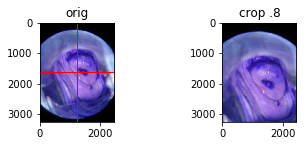

In [6]:
import scipy.ndimage as ndi

#crop test
#cv2.IMREAD_UNCHANGED 
img = cv2.imread('/Users/dc/DeepLearning/kaggle/train/Type_1/0.jpg')
 
resize_img = cv2.resize(img,(32,32),interpolation = cv2.INTER_AREA)

image_resize = resize(img, (32, 32), mode='reflect')

print ("cv2 resize max,min:",np.min(img),np.max(img))
print ("scipy resize max,min:",np.min(image_resize),np.max(image_resize))



height = img.shape[0]
width = img.shape[1]
cv2.line(img,(0,int(height/2.)),(int(width),int(height/2.0)),(255,0,0))
cv2.line(img,(int(width/2.),0),(int(width/2.0),height),(255,0,0))

trans_factor=.8 
zoom_range=[.8,.8]


y_offset = np.random.uniform(0,trans_factor*width)
x_offset = np.random.uniform(0,trans_factor*height)

print ('y_offset:', y_offset, "x_offset:", x_offset)

offset = np.array([0,200])
#center image
#offset=np.array([10,10])
scale_factor = np.random.uniform(zoom_range[0],zoom_range[1])
print (scale_factor)
crop = np.array([[scale_factor,0],[0,scale_factor]])

print('image.shape before roll:',img.shape)
img_roll = np.rollaxis(img,axis=-1, start=0)
print('image.shape after roll:',img_roll.shape)
#this is for the affine transform for each channel you have to roll the axis? Seems funky
#you can use a numpy.reshape also. this is clearer and more mainstream

image_channel = [ndi.interpolation.affine_transform(image_channel,
                        crop, offset=offset, order=0, mode='nearest',
                        cval=0.0) for image_channel in img_roll]
image_array = np.stack(image_channel, axis=0)
image_array = np.rollaxis(image_array, 0, 3)

print ('image_array:',image_array.shape)
#height_rs = image_array.shape[0]
#width_rs = image_array.shape[1]
#print(height_rs, width_rs)
#cv2.line(image_array,(10,10),(100,100),(255,0,0))
#cv2.line(image_array,(0,int(height_rs/2.)),(int(width_rs),int(height_rs/2.0)),(255,0,0))
#cv2.line(image_array,(int(width_rs/2.),0),(int(width_rs/2.0),height_rs),(255,0,0))

fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
ax.imshow(img)
plt.title("orig")
ax1 = fig.add_subplot(2, 2, 2)
ax1.imshow(image_array)
plt.title("crop .8")
#fig.add_subplot(image_array)

#plt.show()
#problem is the shift away from center in the crop .8 image

In [ ]:
#we can crop to produce a smaller resolution. 
import skimage
from skimage.transform import rescale, resize, downscale_local_mean

image = cv2.imread('/Users/dc/DeepLearning/kaggle/train/Type_1/0.jpg')
height = image.shape[0]
width = image.shape[1]
cv2.line(image,(0,int(height/2.)),(int(width),int(height/2.0)),(255,0,0))
cv2.line(image,(int(width/2.),0),(int(width/2.0),height),(255,0,0))


print ('orig:',image.shape)
image_resized = resize(image, (400, 400), mode='reflect')
height = image_resized.shape[0]
width = image_resized.shape[1]
cv2.line(image_resized,(0,int(height/2.)),(int(width),int(height/2.0)),(255,0,0))
cv2.line(image_resized,(int(width/2.),0),(int(width/2.0),height),(255,0,0))

#image_downscaled = downscale_local_mean(image, (480, 640))
print ('resized:',image_resized.shape)
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True)

ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title("Original image")

ax[1].imshow(image_resized)
ax[1].set_title("resized")

#ax[2].imshow(image_downscaled)
#ax[2].set_title("downscaled")


In [ ]:
#not used

X_train1, X_test1, y_train1, y_test1 = train_test_split(img1,lab_1, test_size=.20, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(img2,lab_2,test_size=.20, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(img3,lab_3,test_size=.20, random_state=42)

X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)
print(type(X_train1), type(X_test1), type(y_train1), type(y_test1))

X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)

X_train3 = np.array(X_train3)
X_test3 = np.array(X_test3)


print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

In [32]:
from os import listdir
from os.path import isfile
from os import walk
import random

path='train/Type_1/'
path_add='additional_Type_1_v2/Type_1/'

def return_files_from_dir(path,num_files):
    '''
    input: path: direcory of files to return
           num_files: number of files to return from dir
    output: returns file path+name
    '''
    f = []
    for (dirpath, dirnames, filenames) in walk(path):
        f.extend(filenames)
        break
    if(os.path.isfile(path + '.DS_Store')):
        f.remove('.DS_Store')
    numfiles_to_display = 50
    files_to_display = []
    for x in range(0,numfiles_to_display):
        index = random.randint(0,len(f))
        files_to_display.append(path + f[index])

    return files_to_display

type1_files = return_files_from_dir(path,10)
type1_addfiles = return_files_from_dir(path_add,10)
print (type1_files)
print (type1_addfiles)

['train/Type_1/1229.jpg', 'train/Type_1/787.jpg', 'train/Type_1/553.jpg', 'train/Type_1/879.jpg', 'train/Type_1/1288.jpg', 'train/Type_1/930.jpg', 'train/Type_1/842.jpg', 'train/Type_1/908.jpg', 'train/Type_1/1344.jpg', 'train/Type_1/732.jpg', 'train/Type_1/160.jpg', 'train/Type_1/1274.jpg', 'train/Type_1/481.jpg', 'train/Type_1/346.jpg', 'train/Type_1/1245.jpg', 'train/Type_1/265.jpg', 'train/Type_1/96.jpg', 'train/Type_1/1026.jpg', 'train/Type_1/836.jpg', 'train/Type_1/1154.jpg', 'train/Type_1/1393.jpg', 'train/Type_1/580.jpg', 'train/Type_1/725.jpg', 'train/Type_1/10.jpg', 'train/Type_1/142.jpg', 'train/Type_1/13.jpg', 'train/Type_1/1339.jpg', 'train/Type_1/817.jpg', 'train/Type_1/1281.jpg', 'train/Type_1/821.jpg', 'train/Type_1/27.jpg', 'train/Type_1/27.jpg', 'train/Type_1/434.jpg', 'train/Type_1/1285.jpg', 'train/Type_1/218.jpg', 'train/Type_1/779.jpg', 'train/Type_1/984.jpg', 'train/Type_1/1336.jpg', 'train/Type_1/821.jpg', 'train/Type_1/13.jpg', 'train/Type_1/921.jpg', 'train/Ty

left: 0.125
right: 0.9
top: 0.88
bottom: 0.125
wspace: 0.2
hspace: 0.2
height_ratios: None
width_ratios: None
grid positions: ([0.77214285714285713, 0.64271428571428568, 0.51328571428571423, 0.38385714285714279, 0.25442857142857134, 0.12499999999999989], [0.88, 0.75057142857142856, 0.62114285714285711, 0.49171428571428566, 0.36228571428571421, 0.23285714285714276], [0.125, 0.28534482758620694, 0.44568965517241382, 0.60603448275862082, 0.76637931034482765], [0.25862068965517243, 0.41896551724137931, 0.57931034482758625, 0.73965517241379319, 0.90000000000000013])


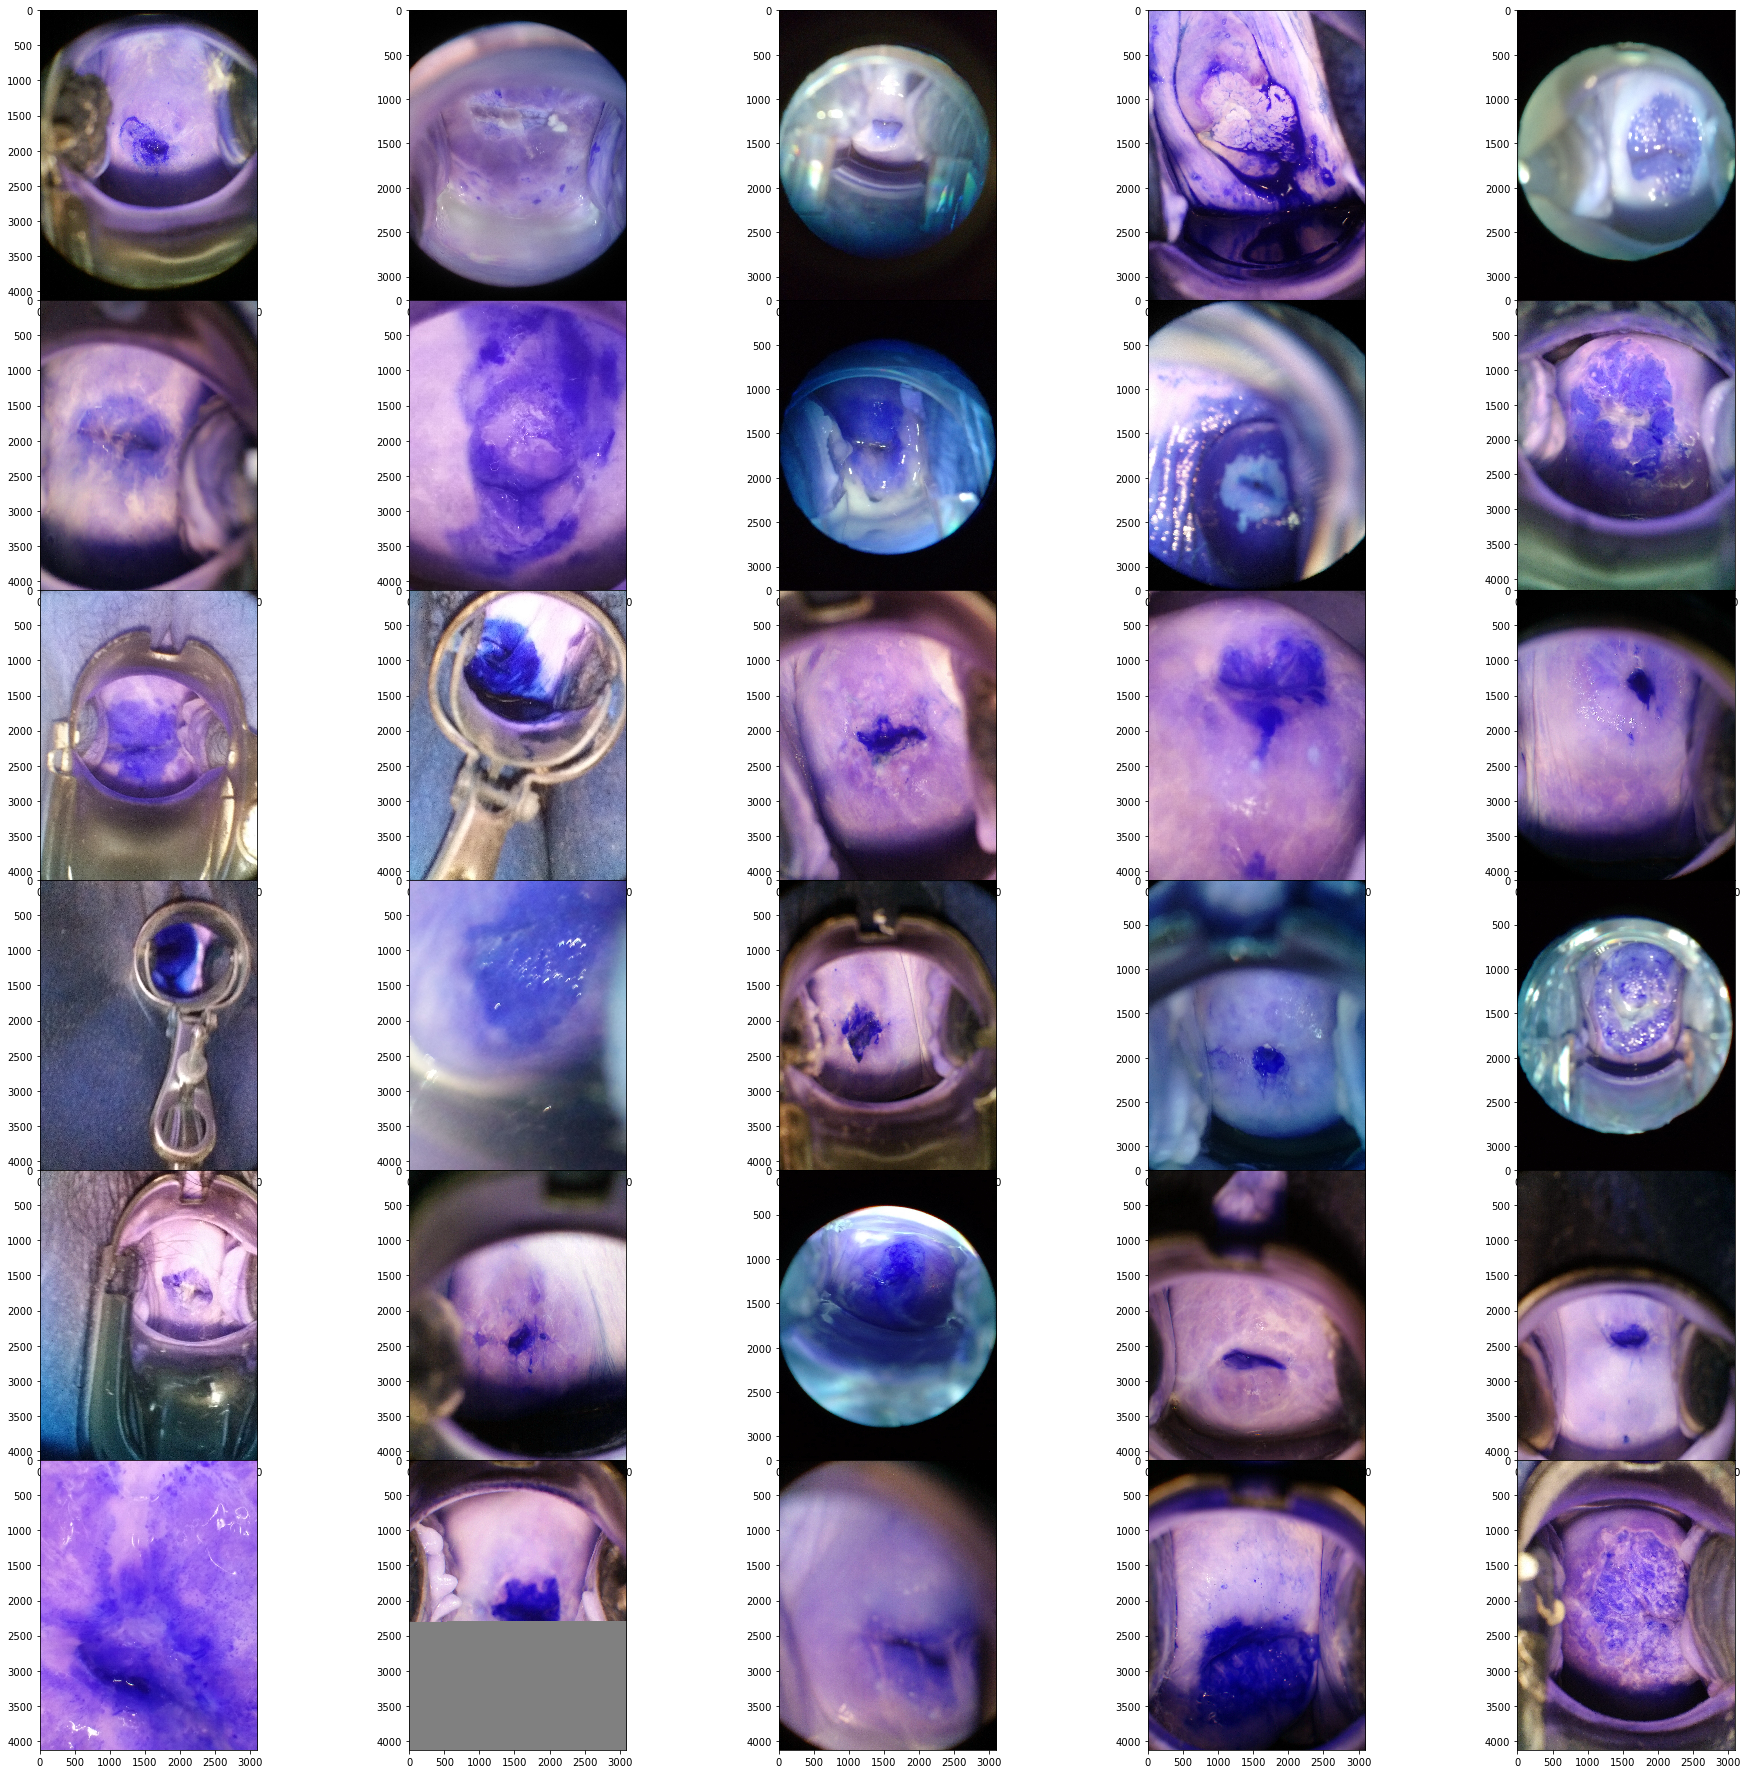

In [48]:
#when using matplotlib inline that means the window size is constrained by the 
# browser window size. If you do a 5x5 gridspec that fills up the browser window
#and if you add more rows after that the individual fig size gets smaller. 
# you can use an external window

images = []

for x in type1_files:
    #print ('x:',x)
    img = cv2.imread(x)
    #print (img.shape)
    images.append(img)

#print (images[0].shape)
#problem w 3 rows is it makes the images smaller

num_rows = 6
num_cols = 5

fig = plt.figure(figsize=(32,32))

gs = gridspec.GridSpec(num_rows, num_cols, 
                       left=None, bottom=None, 
                       right=None, top=None, wspace=None, 
                       hspace=None, width_ratios=None, height_ratios=None)
#setting gridspec params to None shows the default values below
print('left:',gs.get_subplot_params(fig).left)
print('right:',gs.get_subplot_params(fig).right)
print('top:',gs.get_subplot_params(fig).top)
print('bottom:',gs.get_subplot_params(fig).bottom)
print('wspace:',gs.get_subplot_params(fig).wspace)
print('hspace:',gs.get_subplot_params(fig).hspace)
print('height_ratios:',gs.get_height_ratios())
print('width_ratios:',gs.get_width_ratios())
print('grid positions:', gs.get_grid_positions(fig))
plt.subplots_adjust(hspace = .001)
#plt.subplots_adjust(top = .3)
#plt.subplots_adjust(bottom = .1)
#https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib?rq=1
#hspace controls the spacing between rows. Make sure to set it small enough

ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

#gs.tight_layout(fig,pad=0.0, h_pad=0,w_pad=0)

for x in range(0,(num_rows*num_cols)):
    ax[x].imshow(images[x])

In [ ]:
#not used
X_train = np.concatenate((X_train1,X_train2,X_train3))
X_test = np.concatenate((X_test1, X_test2, X_test3))
y_train = np.concatenate((y_train1, y_train2, y_train3))
y_test = np.concatenate((y_test1, y_test2, y_test3))


In [ ]:

lab_1 = np_utils.to_categorical(label_1, 3)
lab_2 = np_utils.to_categorical(label_2, 3)
lab_3 = np_utils.to_categorical(label_3, 3)

img_1 = np.array(img1)
img_2 = np.array(img2)
img_3 = np.array(img3)

print (img_1.shape,lab_1.shape)
print (img_2.shape,lab_2.shape)
print (img_3.shape,lab_3.shape)

In [50]:
from numpy import arange, sin, pi, float, size

import matplotlib
matplotlib.use('WXAgg')
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg
from matplotlib.figure import Figure

import wx

class MyFrame(wx.Frame):
    def __init__(self, parent, id):
        wx.Frame.__init__(self,parent, id, 'scrollable plot',
                style=wx.DEFAULT_FRAME_STYLE ^ wx.RESIZE_BORDER,
                size=(800, 400))
        self.panel = wx.Panel(self, -1)

        self.fig = Figure((5, 4), 75)
        self.canvas = FigureCanvasWxAgg(self.panel, -1, self.fig)
        self.scroll_range = 400
        self.canvas.SetScrollbar(wx.HORIZONTAL, 0, 5,
                                 self.scroll_range)

        sizer = wx.BoxSizer(wx.VERTICAL)
        sizer.Add(self.canvas, -1, wx.EXPAND)

        self.panel.SetSizer(sizer)
        self.panel.Fit()

        self.init_data()
        self.init_plot()

        self.canvas.Bind(wx.EVT_SCROLLWIN, self.OnScrollEvt)

    def init_data(self):

        # Generate some data to plot:
        self.dt = 0.01
        self.t = arange(0,5,self.dt)
        self.x = sin(2*pi*self.t)

        # Extents of data sequence: 
        self.i_min = 0
        self.i_max = len(self.t)

        # Size of plot window:       
        self.i_window = 100

        # Indices of data interval to be plotted:
        self.i_start = 0
        self.i_end = self.i_start + self.i_window

    def init_plot(self):
        self.axes = self.fig.add_subplot(111)
        self.plot_data = \
                  self.axes.plot(self.t[self.i_start:self.i_end],
                                 self.x[self.i_start:self.i_end])[0]

    def draw_plot(self):

        # Update data in plot:
        self.plot_data.set_xdata(self.t[self.i_start:self.i_end])
        self.plot_data.set_ydata(self.x[self.i_start:self.i_end])

        # Adjust plot limits:
        self.axes.set_xlim((min(self.t[self.i_start:self.i_end]),
                           max(self.t[self.i_start:self.i_end])))
        self.axes.set_ylim((min(self.x[self.i_start:self.i_end]),
                            max(self.x[self.i_start:self.i_end])))

        # Redraw:                  
        self.canvas.draw()

    def OnScrollEvt(self, event):

     # Update the indices of the plot:
        self.i_start = self.i_min + event.GetPosition()
        self.i_end = self.i_min + self.i_window + event.GetPosition()
        self.draw_plot()

class MyApp(wx.App):
    def OnInit(self):
        self.frame = MyFrame(parent=None,id=-1)
        self.frame.Show()
        self.SetTopWindow(self.frame)
        return True

if __name__ == '__main__':
    app = MyApp()
    app.MainLoop()

/Users/dc/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


ImportError: Matplotlib backend_wx and backend_wxagg require wxPython >=2.8.12